# Week 7 Naive Bayes

### About The DataWe'll be using the Adult Dataset from kaggle for this lab, but feel free to follow along with your own dataset. The dataset containsthe following attributes: Our goal is to predict whether income exceeds $50k/yr based on census data
    -age
    -workclass
    -fnlwgt
    -education
    -education_num
    -marital_status
    -occupation
    -relationship
    -race
    -sex
    -capital_gain
    -capital_loss
    -hours_per_week
    -native_country
    -income


## Exploratory Data Analysis

In [377]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [378]:
adult_df = pd.read_csv('adult.csv', header=None)
adult_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
'relationship','race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
'income']
adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [379]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [380]:
categoricals = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex',
'native_country', 'income']
numericals = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
adult_df[categoricals].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


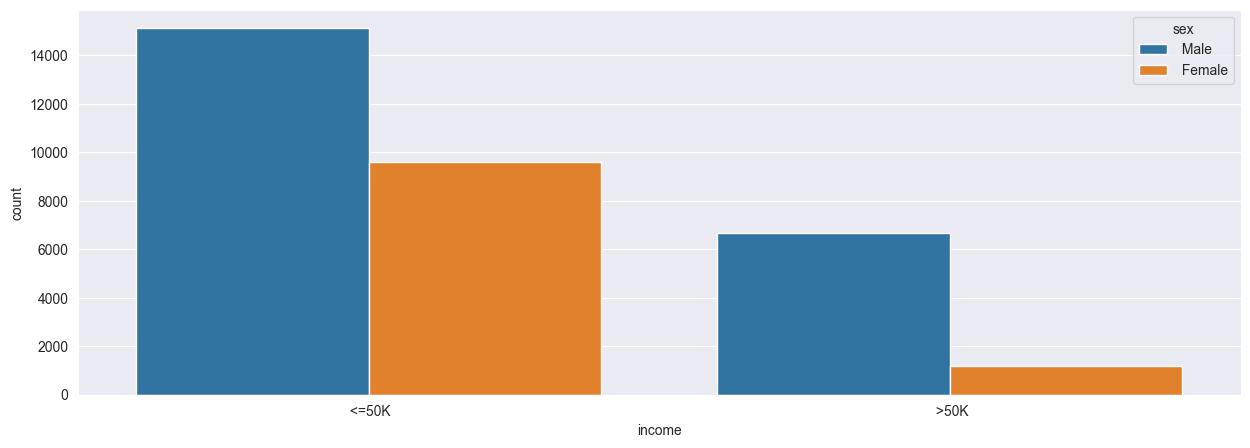

In [381]:
sns.countplot(x=adult_df['income'], hue='sex', data=adult_df)
plt.show()

### Different examples

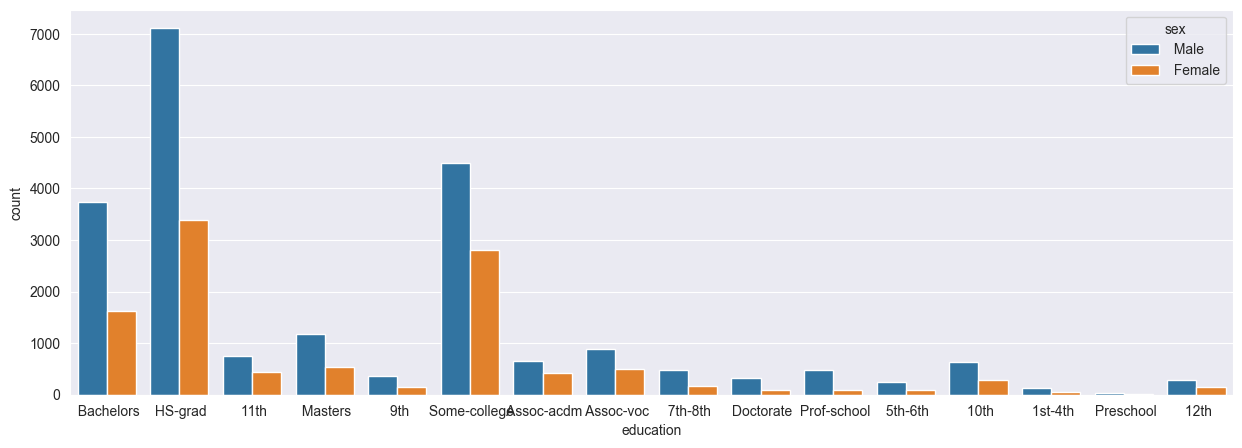

In [382]:
sns.countplot(x=adult_df['education'], hue='sex', data=adult_df)
plt.show()

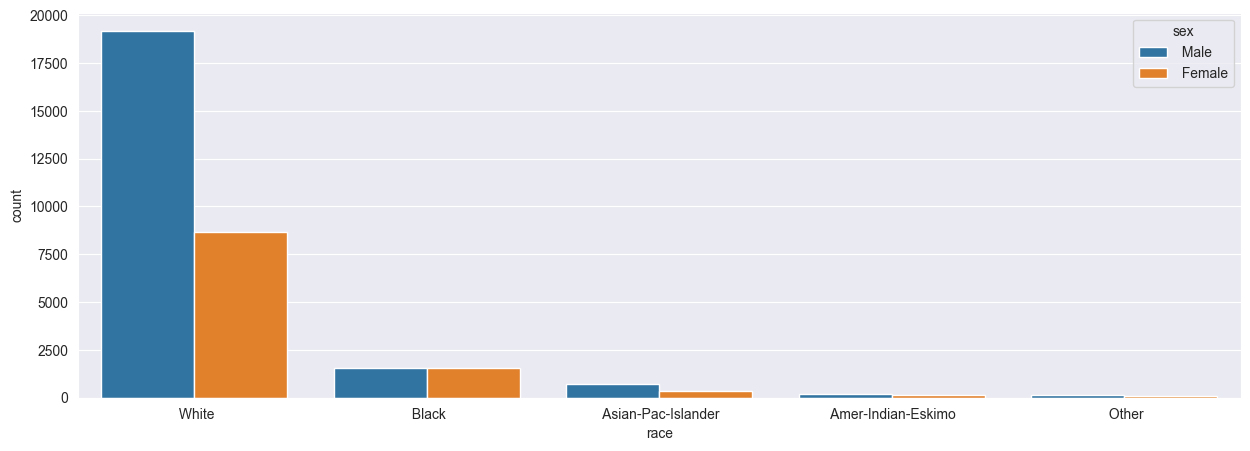

In [383]:
sns.countplot(x=adult_df['race'], hue='sex', data=adult_df)
plt.show()

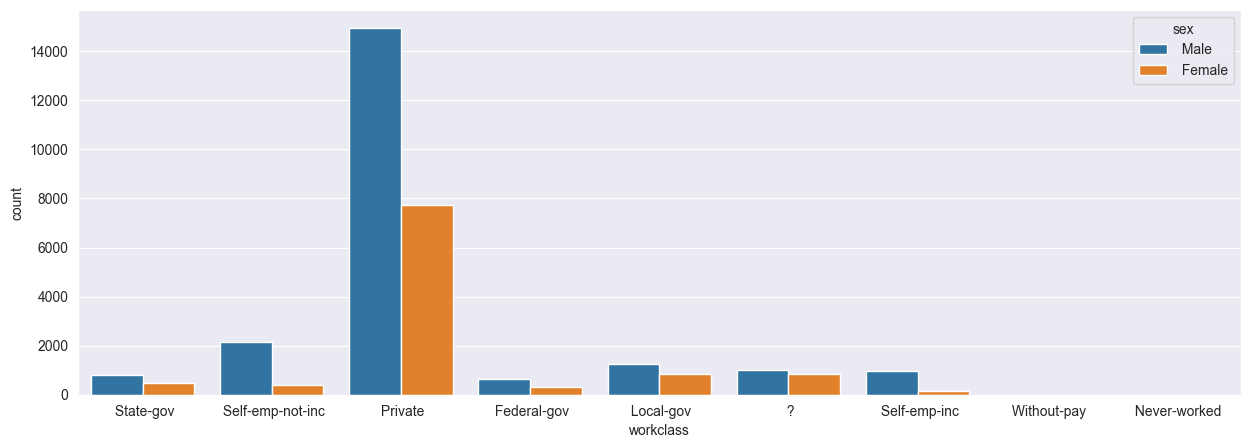

In [384]:
sns.countplot(x=adult_df['workclass'], hue='sex', data=adult_df)
plt.show()

Interpretation: majority of our dataset consist of people earning <=50k, but we can see that in both categories (<=50k and >50k),
majority of the men earn more.
What's the most common education people in our dataset have?

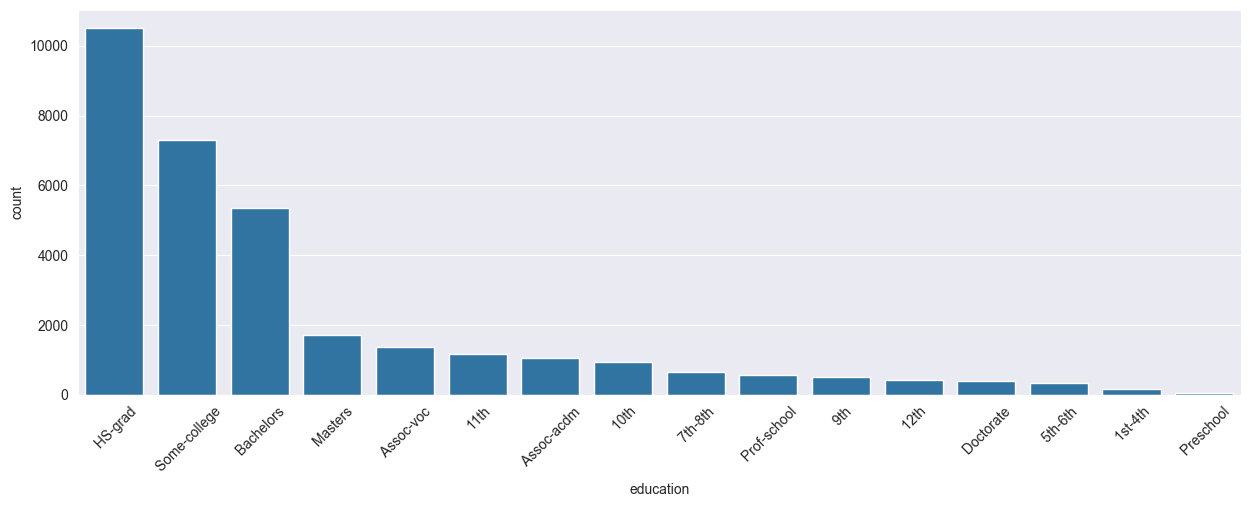

In [385]:
# order= is an optional parameter, which is just sorting the bars in this case.
sns.countplot(x=adult_df['education'], order=adult_df['education'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

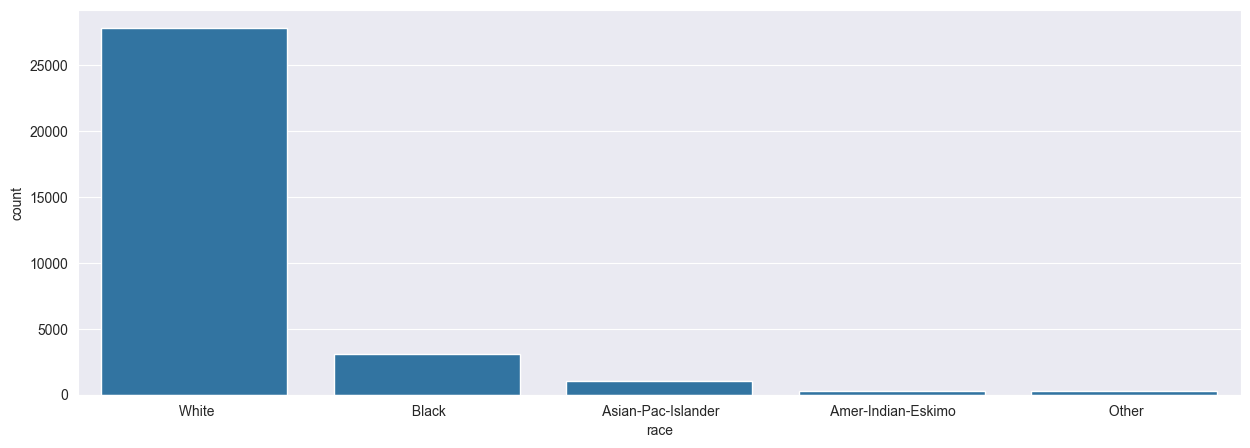

In [386]:
sns.countplot(x=adult_df['race'], data=adult_df)
plt.show()

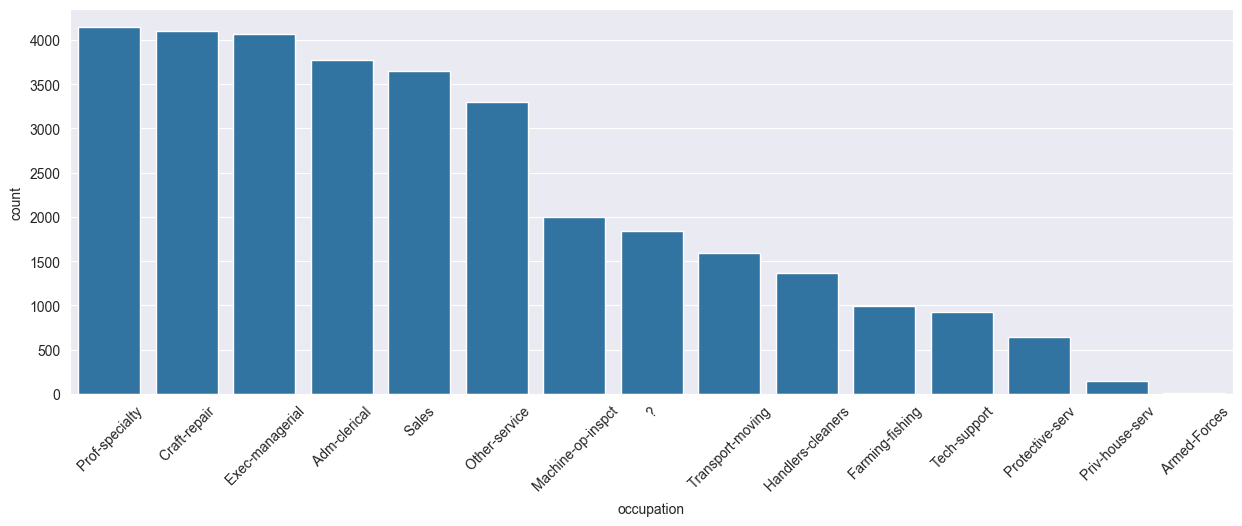

In [387]:
sns.countplot(x=adult_df['occupation'], data=adult_df, order=adult_df['occupation'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

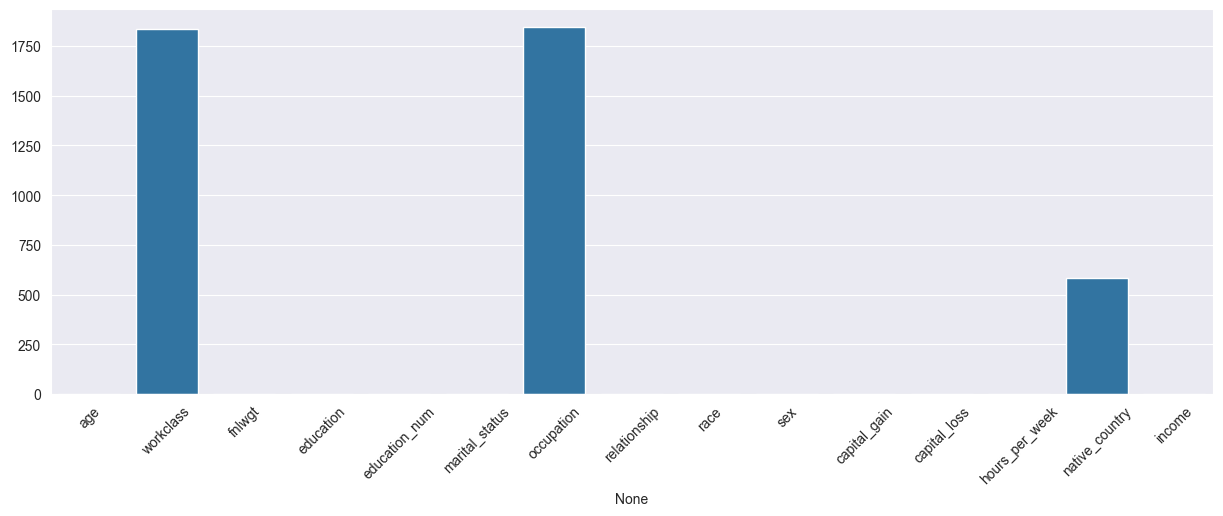

In [388]:
adult_df['workclass'] = adult_df['workclass'].replace(' ?', np.nan)
adult_df['occupation'] = adult_df['occupation'].replace(' ?', np.nan)
adult_df['native_country'] = adult_df['native_country'].replace(' ?', np.nan)

sns.barplot(x=adult_df.columns, y=adult_df.isnull().sum().values)
plt.xticks(rotation=45)
plt.show()

### Different examples

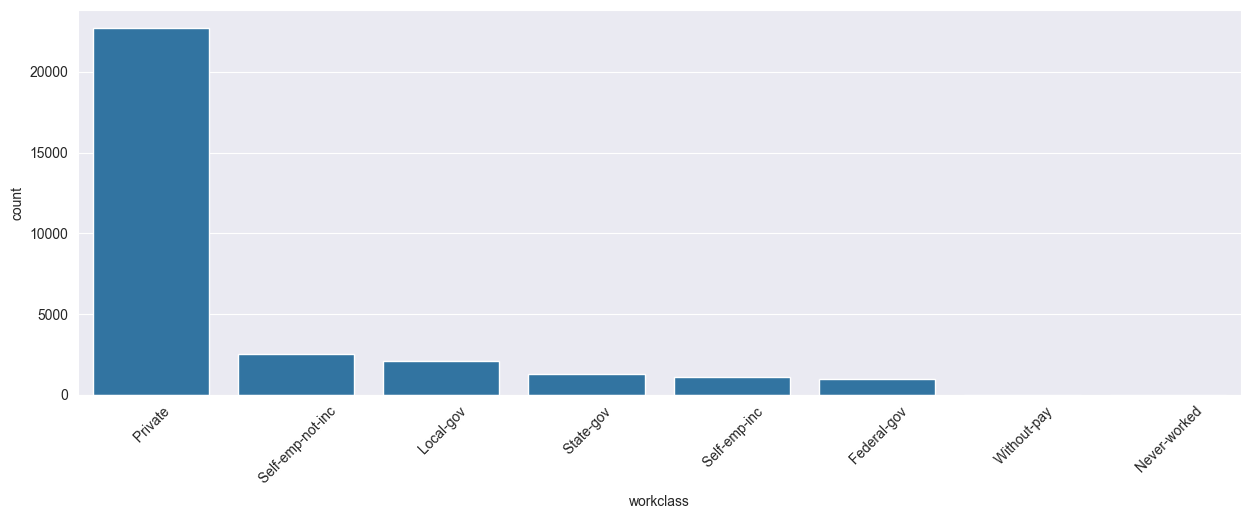

In [389]:
sns.countplot(x=adult_df['workclass'], order=adult_df['workclass'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

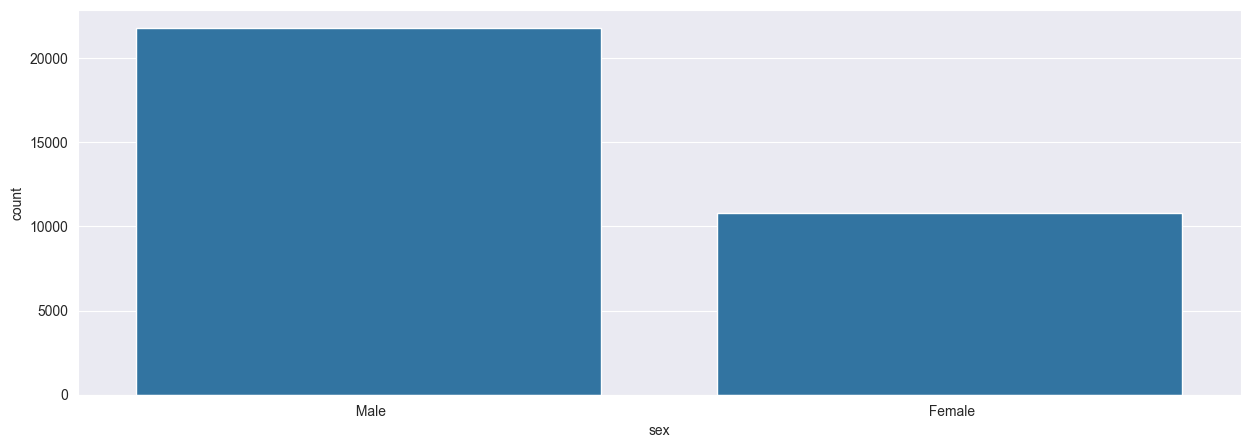

In [390]:
sns.countplot(x=adult_df['sex'], data=adult_df)
plt.show()

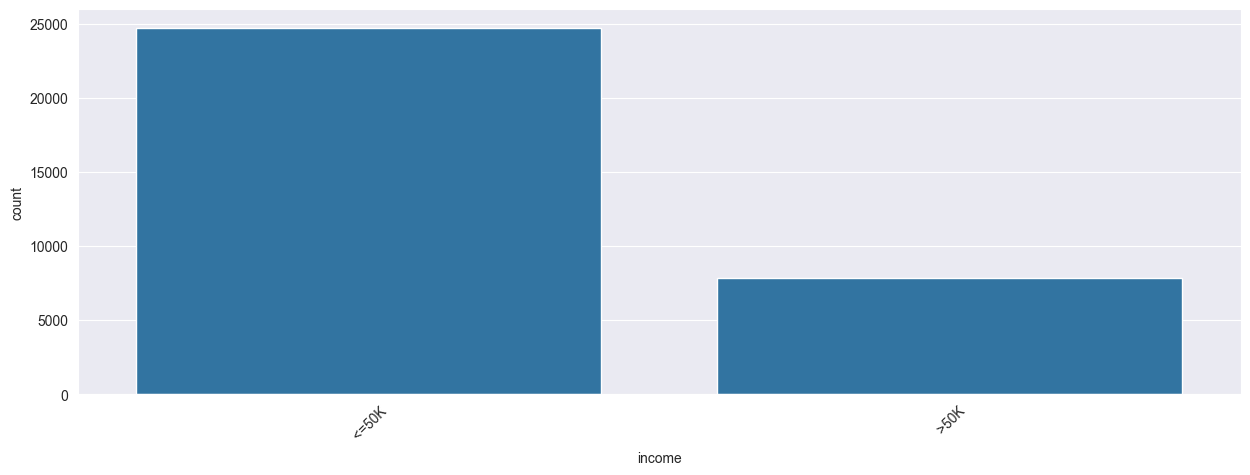

In [391]:
sns.countplot(x=adult_df['income'], data=adult_df, order=adult_df['income'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

Interpretation: Prof‑specialty, craft‑repair, and Exec‑managerial are the top 3 occupations in our dataset. Also, there's a '?'
signifying unknown. We'll have to make sure to replace those question marks with null/nan values since these should really be
missing values. If you take a look, you'll see that workclass and native_country also have '?' values, so we'll replace those with
NaN as follows

In [392]:
adult_df[numericals].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


Let's check if there are any '?' missing values in any of the numerical columns like we had in the categoricals. We can do this by
looping through every variable in the numericals list and printing a note if that column contains a ' ?'.

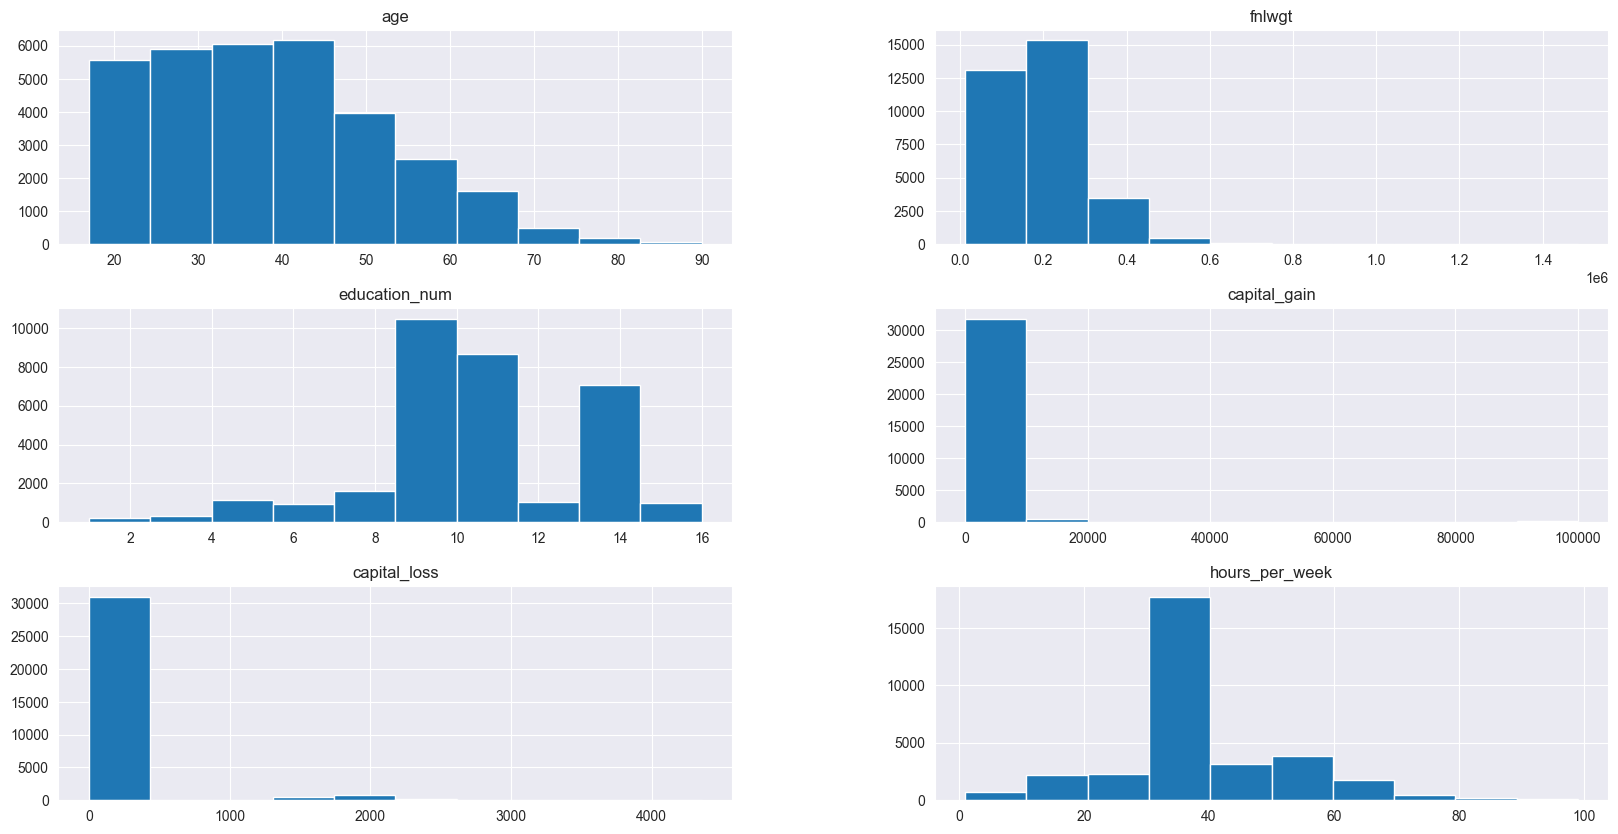

In [393]:
for variable in numericals:
    if not adult_df[adult_df[variable] == ' ?'].empty:
        print(f'{variable} contains missing values ( ?)')
        
adult_df[numericals].hist(figsize=(20,10))
plt.show()

### Pre Processing
We'll first take care of the missing categorical values. One option is to replace the missing values with the most frequent/mode,
which we'll do below. However, options for dealing with missing categorical variables include

In [394]:
adult_df['workclass'].fillna(adult_df['workclass'].mode()[0], inplace=True)
adult_df['occupation'].fillna(adult_df['occupation'].mode()[0], inplace=True)
adult_df['native_country'].fillna(adult_df['native_country'].mode()[0], inplace=True)
adult_df = pd.get_dummies(data=adult_df, columns=categoricals, drop_first=True)
adult_df.head()

C:\Users\Bebe\AppData\Local\Temp\ipykernel_20776\4127495491.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adult_df['workclass'].fillna(adult_df['workclass'].mode()[0], inplace=True)
C:\Users\Bebe\AppData\Local\Temp\ipykernel_20776\4127495491.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ >50K
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,38,215646,9,0,0,40,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,53,234721,7,0,0,40,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
4,28,338409,13,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


Let's now map all of our variables onto the same scale. We'll follow the same steps as the KNN lab. The only difference from KNN
lab is that here we're using RobustScaler, which just scales features using statistics that are robust to outliers

In [395]:
from sklearn.preprocessing import RobustScaler
# all columns except our target column for X
X = adult_df.drop('income_ >50K', axis=1)
y = adult_df['income_ >50K']
# create our scaler object
scaler = RobustScaler()
# use our scaler object to transform/scale our data and save it into X_scaled. Only need to
# transform numerical data.
X_scaled = scaler.fit_transform(X[numericals])
# reassign X[numericals] to the transformed numerical data.
X[numericals] = X_scaled
X.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0.10,-0.845803,1.000000,2174.0,0.0,0.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,0.65,-0.797197,1.000000,0.0,0.0,-5.4,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0.05,0.312773,-0.333333,0.0,0.0,0.0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,0.80,0.472766,-1.000000,0.0,0.0,0.0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,-0.45,1.342456,1.000000,0.0,0.0,0.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


### Different example

In [396]:
print(adult_df.columns)


Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'workclass_ Local-gov', 'workclass_ Never-worked',
       'workclass_ Private', 'workclass_ Self-emp-inc',
       'workclass_ Self-emp-not-inc', 'workclass_ State-gov',
       'workclass_ Without-pay', 'education_ 11th', 'education_ 12th',
       'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th',
       'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc',
       'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad',
       'education_ Masters', 'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse',
       'marital_status_ Married-spouse-absent',
       'marital_status_ Never-married', 'marital_status_ Separated',
       'marital_status_ Widowed', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial'

In [397]:
# all columns except our target column for X
X2 = adult_df.drop('workclass_ Private', axis=1)
y2 = adult_df['workclass_ Private']
# create our scaler object
scaler2 = RobustScaler()
# use our scaler object to transform/scale our data and save it into X_scaled. Only need to
# transform numerical data.
X2_scaled = scaler.fit_transform(X2[numericals])
# reassign X[numericals] to the transformed numerical data.
X2[numericals] = X2_scaled
X.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0.10,-0.845803,1.000000,2174.0,0.0,0.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,0.65,-0.797197,1.000000,0.0,0.0,-5.4,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0.05,0.312773,-0.333333,0.0,0.0,0.0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,0.80,0.472766,-1.000000,0.0,0.0,0.0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,-0.45,1.342456,1.000000,0.0,0.0,0.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


### Creating our model
We're now ready to begin creating and training our model. We first need to split our data into training and testing sets. This can be
done using sklearn's train_test_split(X, y, test_size) function. This function takes in your features (X), the target variable (y), and
the test_size you'd like (Generally a test size of around 0.3 is good enough). It will then return a tuple of X_train, X_test, y_train,
y_test sets for us. We will train our model on the training set and then use the test set to evaluate the model.

In [398]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

from sklearn.naive_bayes import GaussianNB
# instantiate the model to train a Gaussian Naive Bayes classifier
gnb = GaussianNB()
# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

### Different example

In [399]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3)
gnb2 = GaussianNB()
# fit the model
gnb2.fit(X2_train, y2_train)

GaussianNB()

### Model Evaluation

Now that we've finished training, we can make predictions off of the test data and evaluate our model's performance using the
corresponding test data labels (y_test).

In [400]:
y_pred = gnb.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8220


In [401]:
y_pred_train = gnb.predict(X_train)
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.8253
Test set score: 0.8220


The training set accuracy score is 0.8241 while the test set accuracy is 0.8228. These two values are quite comparable, so there is
no sign of overfitting

In [402]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[6412 1084]
 [ 655 1618]]

True Positives(TP) =  6412

True Negatives(TN) =  1618

False Positives(FP) =  1084

False Negatives(FN) =  655


Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and
support scores for the model. Let's print these as well.

In [403]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.91      0.86      0.88      7496
        True       0.60      0.71      0.65      2273

    accuracy                           0.82      9769
   macro avg       0.75      0.78      0.77      9769
weighted avg       0.84      0.82      0.83      9769



Let's also perform k‑Fold Cross Validation (10‑fold below). We can do this using cross_val_score(model, X_train, y_train, k,
scoring

In [404]:
from sklearn.model_selection import cross_val_score
# Applying 10Fold Cross Validation
scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')
print('Crossvalidation scores: {}'.format(scores))
# compute Average crossvalidation score
print('\nAverage crossvalidation score: {:.4f}'.format(scores.mean()))

Crossvalidation scores: [0.81798246 0.82412281 0.83852567 0.82667837 0.81307591 0.83018868
 0.8214129  0.83282141 0.8214129  0.82492321]

Average crossvalidation score: 0.8251


### Different example

In [405]:
y2_pred = gnb2.predict(X2_test)

print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y2_test, y2_pred)))

Model accuracy score: 0.9175


In [406]:
y_pred_train2 = gnb2.predict(X2_train)
print('Training set score: {:.4f}'.format(gnb2.score(X2_train, y2_train)))
print('Test set score: {:.4f}'.format(gnb2.score(X2_test, y2_test)))

Training set score: 0.9185
Test set score: 0.9175


In [407]:
cm2 = confusion_matrix(y2_test, y2_pred)
print('Confusion matrix\n\n', cm2)
print('\nTrue Positives(TP) = ', cm2[0,0])
print('\nTrue Negatives(TN) = ', cm2[1,1])
print('\nFalse Positives(FP) = ', cm2[0,1])
print('\nFalse Negatives(FN) = ', cm2[1,0])

Confusion matrix

 [[2056  389]
 [ 417 6907]]

True Positives(TP) =  2056

True Negatives(TN) =  6907

False Positives(FP) =  389

False Negatives(FN) =  417


In [408]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

       False       0.83      0.84      0.84      2445
        True       0.95      0.94      0.94      7324

    accuracy                           0.92      9769
   macro avg       0.89      0.89      0.89      9769
weighted avg       0.92      0.92      0.92      9769



In [409]:

# Applying 10Fold Cross Validation
scores2 = cross_val_score(gnb2, X2_train, y2_train, cv = 10, scoring='accuracy')
print('Crossvalidation scores: {}'.format(scores2))
# compute Average crossvalidation score
print('\nAverage crossvalidation score: {:.4f}'.format(scores2.mean()))

Crossvalidation scores: [0.92324561 0.91622807 0.92101799 0.90741553 0.91706889 0.91750768
 0.91838526 0.9324265  0.91970162 0.90785432]

Average crossvalidation score: 0.9181
